In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import os

# Variables

In [2]:
data_folder_name = 'data'
reservoir_vial = 0
lagoon_vial = 1

In [3]:
# Name Constants
timename = 'Time [hr]'
odname = 'OD'
ratename = 'Chemostat Rate [V/hr]'
driftname = 'Drift Concentration [X]'
tempname = 'Temperature [C]'
gratename = "Growth Rate"
pumpname = 'Pump Event'

# eVOLVER data file folder names
name_to_foldername = { 
    odname:'OD',
    ratename:'chemo_log',
    driftname:'drift_log',
    tempname:'temp',
    gratename:'growthrate',
    pumpname:'pump_log',
}

# Functions

In [4]:
def read_csv(x, varname, colnames):
    '''
    Reads the data file for the given vial and parameter
    x: vial number
    varname: parameter name
    colnames: column names of the data file
    '''
    try:
        dataPath = os.path.join("..", data_folder_name, varname,'vial%d_%s.txt'%(x,varname))
        df = pd.read_csv(dataPath, names=colnames,header=0)
    except OSError as err:
        print("OS error:", err)
        print("Make sure the data_folder_name variable matches the data folder name")
    except Exception as err:
        print(f"Unexpected {err=}, {type(err)=}")
        raise
    
    return df

## Theme For Plotting

In [5]:
# alter the default rc params
# see here::   https://matplotlib.org/stable/api/matplotlib_configuration_api.html#default-values-and-styling

sns.set_theme(
    style="white", palette="tab10", font_scale=1,
    rc={"figure.dpi":200, 'savefig.dpi':200, "figure.figsize":[10, 7],
#        'savefig.facecolor':'white','axes.facecolor':'white', #white background rather than transparent
        'pdf.fonttype':42,# 'font.sans-serif':'Helvetica Neue'
        'legend.frameon':False, # box around legend
        'savefig.bbox':'tight', 'savefig.transparent':False
       })

##### FONT SIZE #####
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('figure', titlesize=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('legend', title_fontsize=MEDIUM_SIZE)    # legend fontsize

# Plotting

## OD

In [ ]:
# Variables for Plot Generation
min_time = 0 # hours to plot from
max_time = 9999 # hours to plot until
save_plots = True # whether to save plots
save_title = f'OD Plot'

# Read data
df1 = read_csv(reservoir_vial,odname,colnames=[timename, odname])
# print(df1.head())
df1 = df1[(df1[timename] > min_time) & (df1[timename] <= max_time)] # restrict to time range
df2 = read_csv(lagoon_vial,odname,colnames=[timename, odname]) 
df2 = df2[(df2[timename] > min_time) & (df2[timename] <= max_time)] # restrict to time range
# print(df2.head())

# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 6))
# color = 'tab:blue'
# ax1.set_ylabel(ratename, color=color)
sns.lineplot(x=timename, y=odname, data=df1, ax=ax1, label='Reservoir')
sns.lineplot(x=timename, y=odname, data=df2, ax=ax1, label='Lagoon')
# ax1.tick_params(axis='y', labelcolor=color)

if save_plots:
    plt.savefig(save_title+".pdf")

# Show plot
plt.show()

## Drift and Chemostat Rate

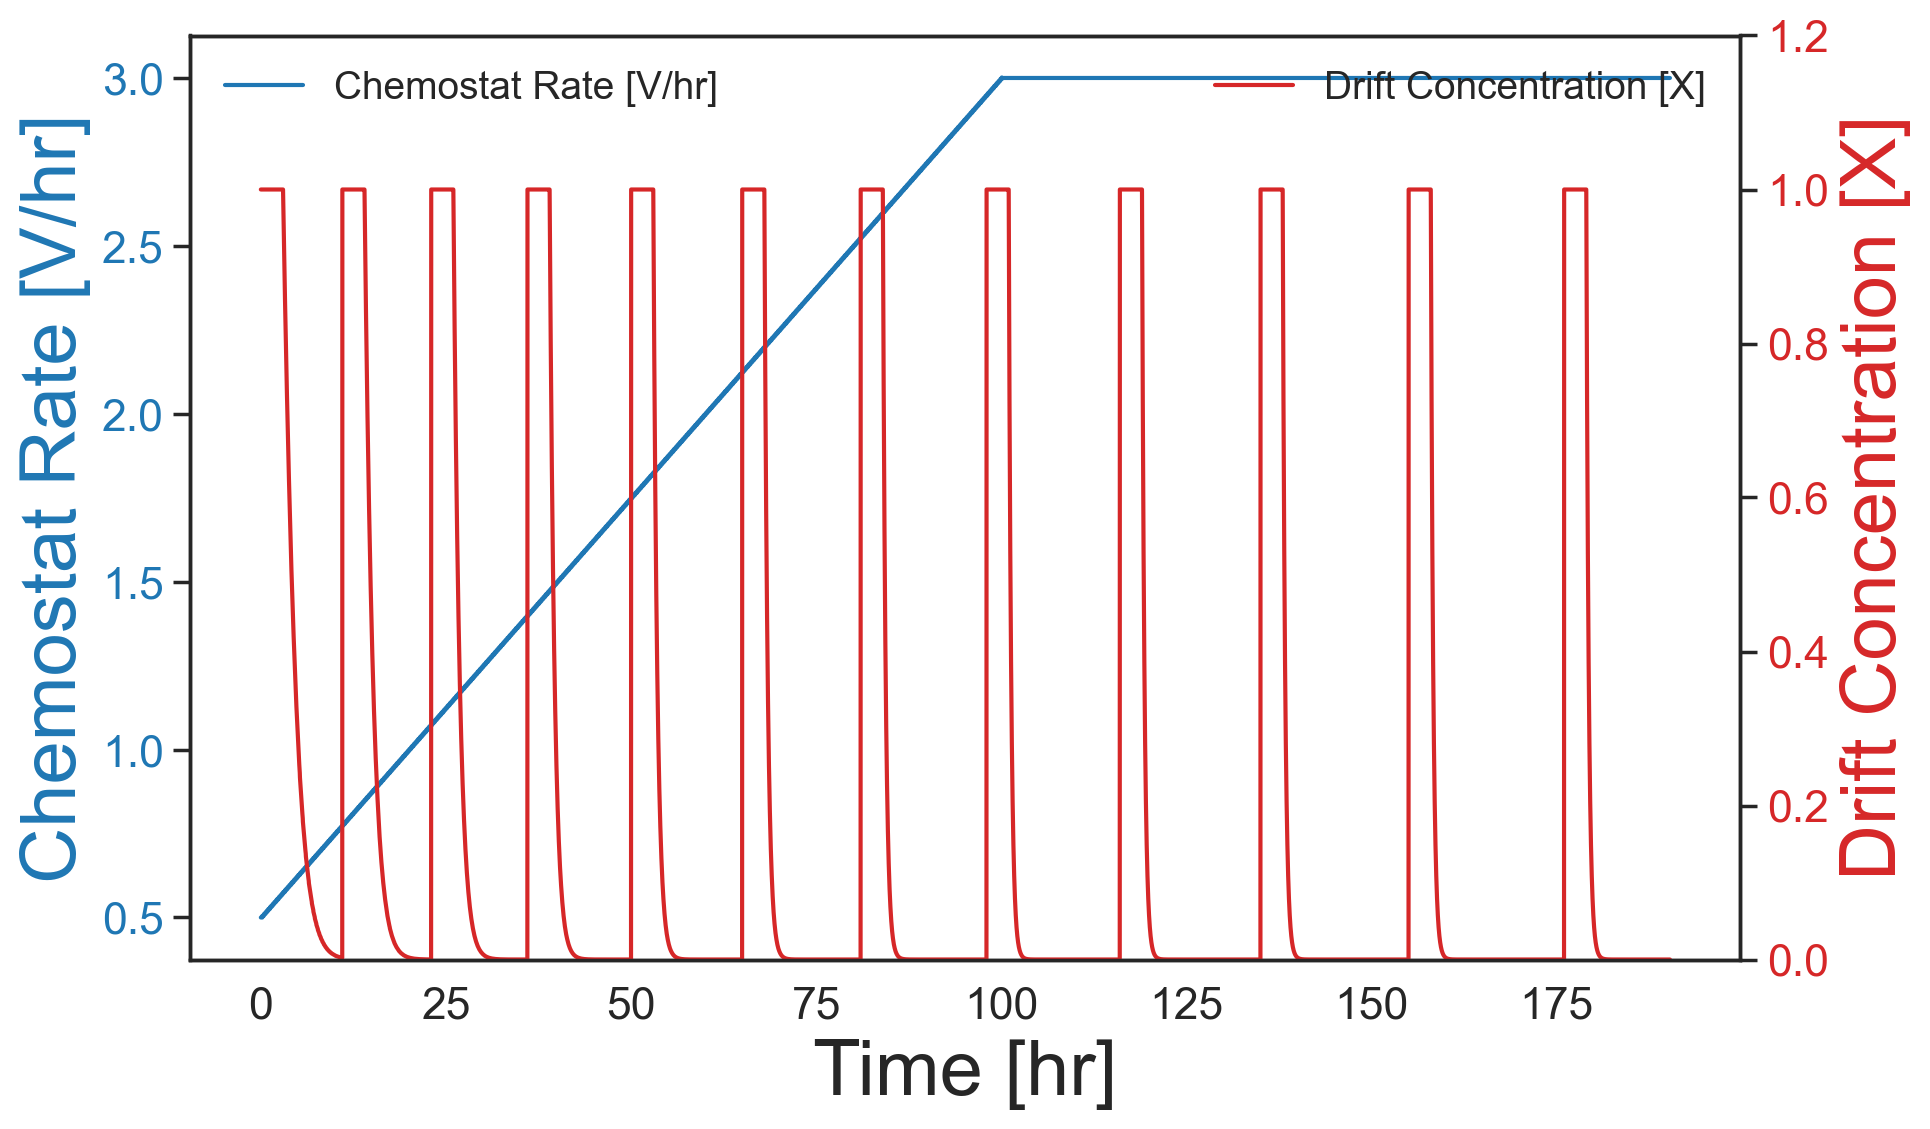

In [7]:
# Variables for Plot Generation
min_time = 0 # hours to plot from
max_time = 9999 # hours to plot until
save_plots = True # whether to save plots
save_title = f'Drift and Chemostat Rate Plot'

# Read data
df1 = read_csv(lagoon_vial,'drift_log',colnames=[timename, driftname, 'Drift Start', 'Drift End', 'Drift Cycle #'])
# print(df1.head())
df1 = df1[(df1[timename] > min_time) & (df1[timename] <= max_time)] # restrict to time range
df2 = read_csv(lagoon_vial,'chemo_log',colnames=[timename, ratename, 'Step Time']) 
df2 = df2[(df2[timename] > min_time) & (df2[timename] <= max_time)] # restrict to time range
# print(df2.head())

# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'tab:blue'
ax1.set_ylabel(ratename, color=color)
sns.lineplot(x=timename, y=ratename, data=df2, ax=ax1, label=ratename)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a lineplot on the second axis
ax2 = ax1.twinx()
color = 'tab:red'
# Creating a lineplot on the first axis
sns.lineplot(x=timename, y=driftname, data=df1, color=color, ax=ax2, label=driftname)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel(driftname, color=color)
ax2.set_ybound(0, 1.2)

if save_plots:
    plt.savefig(save_title+".pdf")

# Show plot
plt.show()